In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
credit = pd.read_csv('creditcard.csv')
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
credit['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [4]:
class_count_0, class_count_1 = credit['Class'].value_counts()

In [5]:
# Separate class
class_0 = credit[credit['Class'] == 0]
class_1 = credit[credit['Class'] == 1]

In [6]:
class_0.shape, class_1.shape

((284315, 31), (492, 31))

total class of 1 and 0: 1    284315
0    284315
Name: Class, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

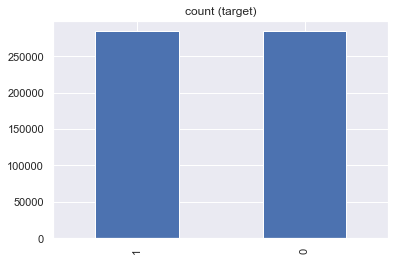

In [8]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0:",test_over['Class'].value_counts())# plot the count after under-sampeling
test_over['Class'].value_counts().plot(kind='bar', title='count (target)')

In [9]:
X_over = test_over.iloc[:, 1:-1]
y_over = test_over.iloc[:, -1]

In [10]:
x_train_over, x_test_over, y_train_over, y_test_over = train_test_split(X_over,y_over, random_state=1)

In [12]:
# import linrary
from xgboost import XGBClassifier

xgb_model_over = XGBClassifier().fit(x_train_over, y_train_over)

# predict
xgb_y_predict_over = xgb_model_over.predict(x_test_over)

# accuracy score
xgb_score_over = accuracy_score(xgb_y_predict_over, y_test_over)

print('Accuracy score is:', xgb_score_over)#OUTPUT

Accuracy score is: 0.9999085524557183


In [13]:
cnf_matrix = confusion_matrix(y_test_over,xgb_y_predict_over)
cnf_matrix

array([[71010,    13],
       [    0, 71135]])

In [14]:
X_fraud = class_1.iloc[:, 1:-1]
X_notfraud = class_0.iloc[:, 1:-1]

In [16]:
xgb_y_predict_fraud = xgb_model_over.predict(X_fraud)

list(xgb_y_predict_fraud).count(0),list(xgb_y_predict_fraud).count(1)

(0, 492)

In [19]:
xgb_y_predict_notfraud = xgb_model_over.predict(X_notfraud)

list(xgb_y_predict_notfraud).count(0),list(xgb_y_predict_notfraud).count(1)

(284302, 13)

In [20]:
credit.shape

(284807, 31)

In [22]:
284302/284315 

0.9999542760670384

(284315, 29)